In [2]:
from flat_regions import loss_landscape, plot_loss_landscape_heatmap
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sgd_vs_blr import GD, modified_logistic_loss, gradient_logistic_loss, f, gradient_f, BLR_descent
from tqdm import tqdm

In [3]:
def plot_function(loss_function):
    theta_values = np.linspace(-2, 20, 100000)

    loss_values = loss_function(theta_values)

    plt.figure(figsize=(10, 6))
    plt.plot(theta_values, loss_values, label='Loss Function 1')
    plt.title('Loss Function 1')
    plt.xlabel('$\\theta$')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [4]:
def loss_function_1(theta):
    return 0.5 * (theta**2) + np.sin(5 * theta)

def loss_function_2(theta):
    return theta**4 - 4 * theta**3 + theta**2 + 3 * theta + 1

def loss_function_3(theta):
    return np.cos(3 * theta) + 0.2 * theta


import numpy as np

import numpy as np

def custom_loss_function_smooth(theta):
    """
    Custom loss function with values between 0 and 1, one significant minimum around 0.2,
    and other local minima not going below 0.7. This version ensures the output range
    through careful design of the function itself and smoothing out sinusoidal components.

    Parameters:
    - theta: A real-valued parameter.

    Returns:
    - Loss value for the given theta, naturally constrained between 0 and 1.
    """
    cosine_part = 0.15 * (np.cos(0.8 * np.pi * theta)**2 + 1)  # Now peaks around 0.3, base around 0.85
    
    gaussian_part = 0.65 * np.exp(-30 * (theta - 0.5)**2)
    
    loss = 0.85 - cosine_part - gaussian_part
    
    return loss






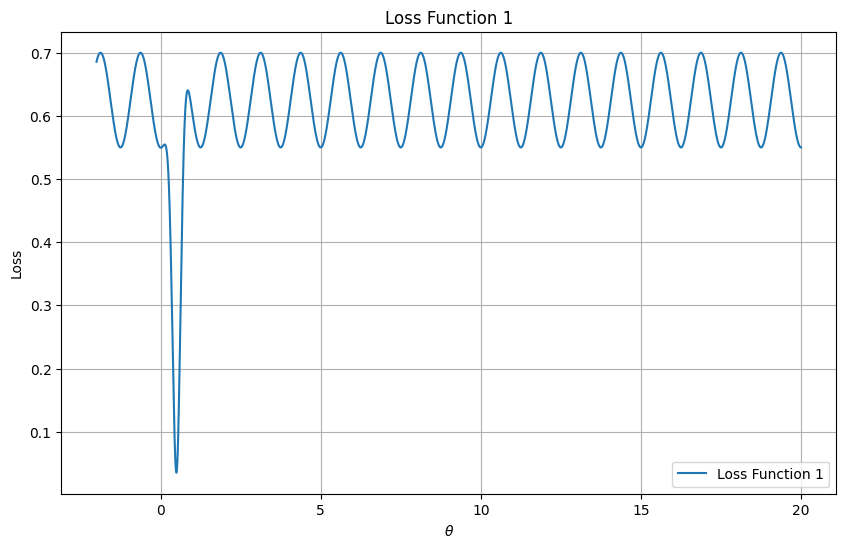

100%|██████████| 90/90 [01:11<00:00,  1.25it/s]


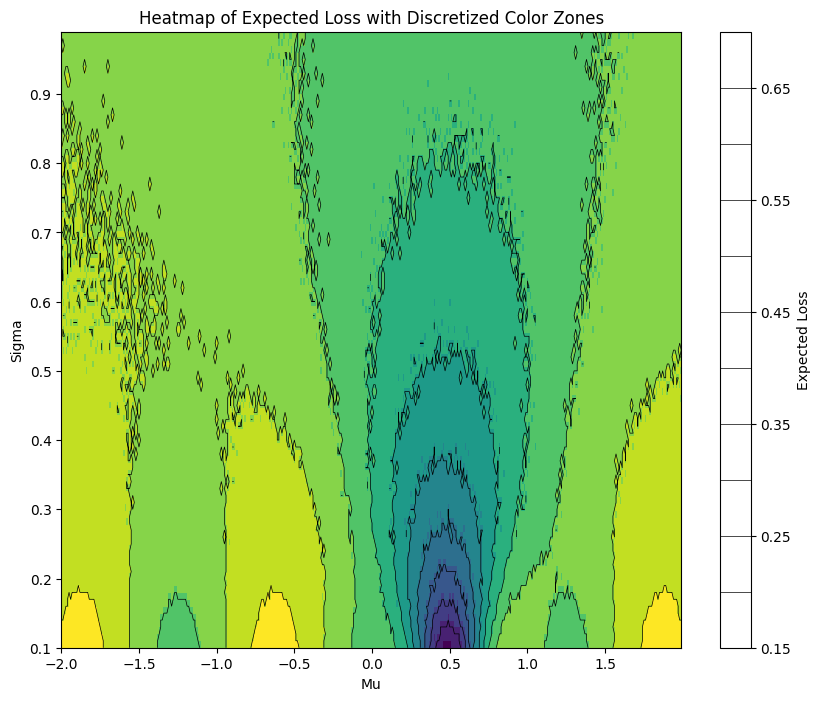

In [5]:
plot_function(custom_loss_function_smooth)
plot_loss_landscape_heatmap((-2, 2, 0.01), (0.1, 1, 0.01), custom_loss_function_smooth, n_samples=1000)

This shows the implicit regularizing effect of the Bayesian view point. The higher the variance of the posterior, the smoother the expected loss function. This regularization is popular in many deep learning algorithms. 
Instead of the original loss, Bayesian view point optimizes a different one which can be more smooth, thus finding more stable minima. This can lead to more robust solutions. 

Initial m: -0.9293005133364953
number of iterations: 5336
Initial m: -0.9293005133364953
number of iterations: 9348
Initial m: -0.9293005133364953
number of iterations: 10001


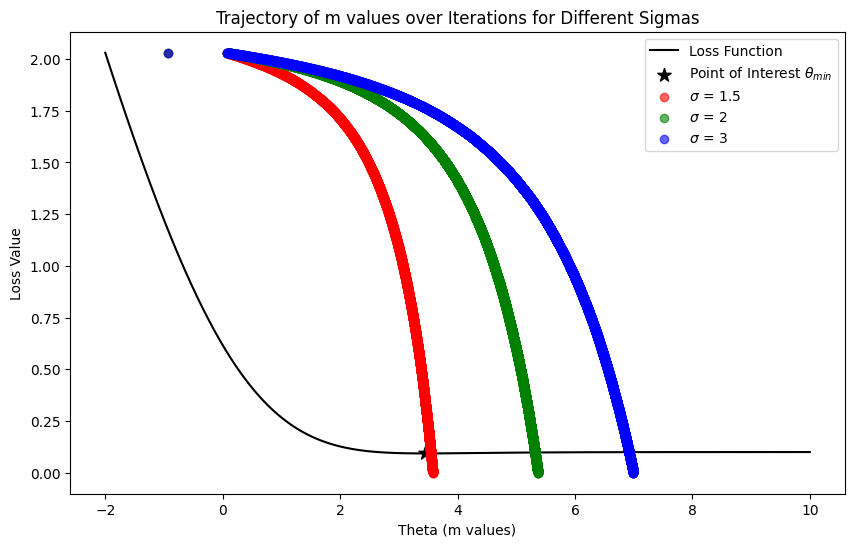

In [6]:
m = np.random.randn()
BLR = BLR_descent(sigma=1, n_samples=1000)
m_values1 = BLR.descent(modified_logistic_loss, n_iter=10000, step_size=0.01, m=m)
BLR = BLR_descent(sigma=2, n_samples=1000)
m_values2 = BLR.descent(modified_logistic_loss, n_iter=10000, step_size=0.01, m=m)
BLR = BLR_descent(sigma=3, n_samples=1000)
m_values3 = BLR.descent(modified_logistic_loss, n_iter=10000, step_size=0.01, m=m)


theta_values = np.linspace(-2, 10, 4000)
loss_values = modified_logistic_loss(theta_values)

# Adjusting the plot function to include multiple trajectories for different sigma values
# Let's say we have 3 different sets of m_values corresponding to 3 different sigma values

# Mock-up of three sets of m_values to represent different sigma values
sigmas = [1.5, 2, 3]  # Different sigma values
m_values_sets = [m_values1, m_values2, m_values3]

# Colors for different sigma trajectories
colors = ['red', 'green', 'blue']

# Begin plotting
plt.figure(figsize=(10, 6))

# Plot the loss function
plt.plot(theta_values, loss_values, label='Loss Function', zorder=1, color='black')
theta_star = 3.4489
loss_star = modified_logistic_loss(theta_star)
plt.scatter(theta_star, loss_star, color="black", marker="*", s=100, label="Point of Interest $\\theta_{min}$")

# Plot each trajectory
for sigma, m_values, color in zip(sigmas, m_values_sets, colors):
    iteration_indices = np.linspace(0, max(loss_values), len(m_values))
    plt.scatter(m_values, max(loss_values) - iteration_indices, color=color, alpha=0.6, label=f'$\sigma$ = {sigma}', zorder=3)

# Additional plot formatting
plt.title('Trajectory of m values over Iterations for Different Sigmas')
plt.xlabel('Theta (m values)')
plt.ylabel('Loss Value')
plt.legend()
plt.show()



We see that the higher $\sigma$ is, the further in the flat direction shifts the minimum.
This highlights the importance of the choice of the standard deviation when the posterior has fixed mean. 

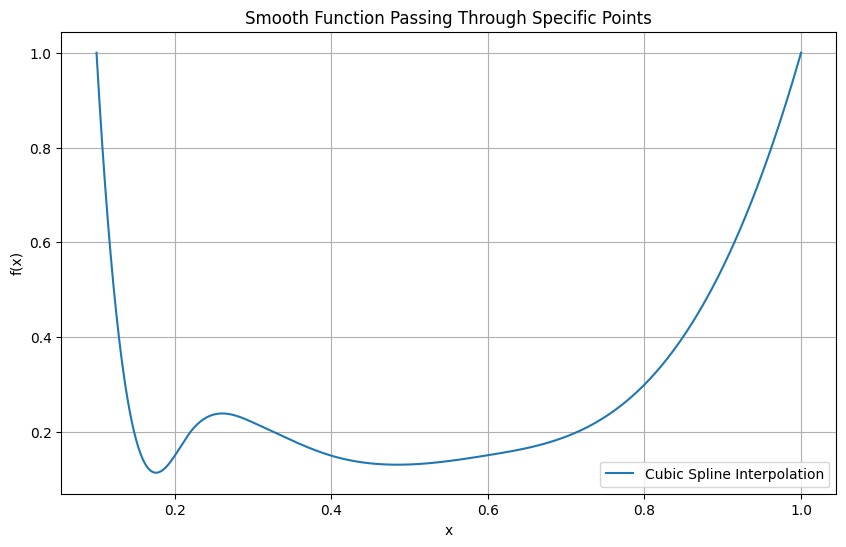

In [7]:
from scipy.interpolate import CubicSpline

# Define the points through which the function should pass
x_points = np.array([0.1, 0.2, 0.22, 0.3, 0.4, 0.6, 0.8, 1.0])
y_points = np.array([1.0, 0.15, 0.2, 0.22, 0.15, 0.151, 0.3, 1.0])

# Create the cubic spline interpolation
cs = CubicSpline(x_points, y_points)

# Generate x values for plotting
x_new = np.linspace(0.1, 1, 1000)

# Plot the spline interpolation
plt.figure(figsize=(10, 6))
plt.plot(x_new, cs(x_new), label="Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Smooth Function Passing Through Specific Points")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
BLR = BLR_descent(sigma=0.1, n_samples=1000)
m_values1 = BLR.descent(cs, n_iter=100000, step_size=0.001, m = .051, min = False)
print(m_values1[-1])
theta_values1, _ = GD.descent(cs, cs.derivative(), n_iter=10000, step_size=0.001, theta = 0.05)
print(theta_values1[-1])

Initial m: 0.051
number of iterations: 524
0.5496455594040528
number of iterations: 36
0.1759963713223764


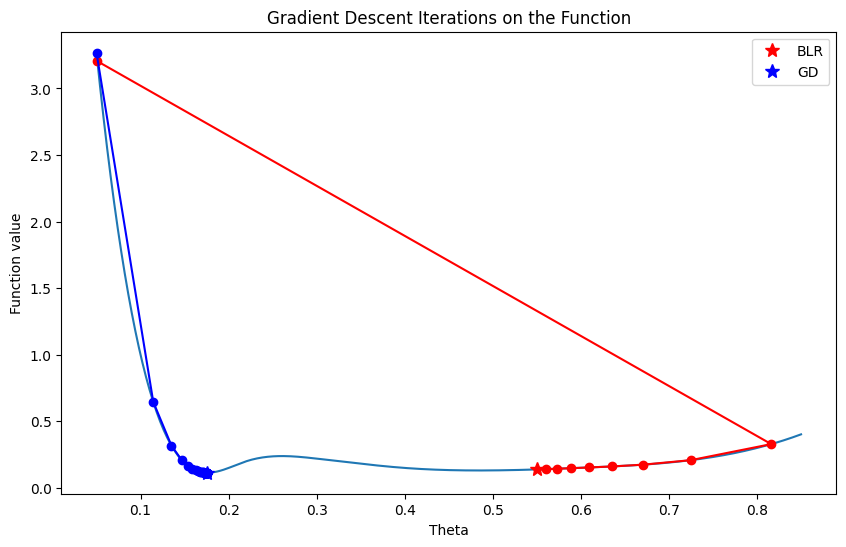

In [9]:
indices1 = np.linspace(0, len(m_values1) - 1, 10, dtype=int)
selected_iterations1 = [m_values1[i] for i in indices1]

indices2 = np.linspace(0, len(theta_values1) - 1, len(theta_values1), dtype=int)
selected_iterations2 = [theta_values1[i] for i in indices2]

theta_values = np.linspace(0.05, .85, 400)
function_values = cs(theta_values)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, function_values)

for i in range(len(selected_iterations1) - 1):
    plt.plot([selected_iterations1[i], selected_iterations1[i+1]], 
             [cs(selected_iterations1[i]), cs(selected_iterations1[i+1])], 'r-')
    plt.plot(selected_iterations1[i], cs(selected_iterations1[i]), 'ro')  # Points intermédiaires en ronds
plt.plot(selected_iterations1[-1], cs(selected_iterations1[-1]), 'r*', markersize=10, label='BLR')  # Dernier point en étoile

# Tracer des traits entre les points successifs pour GD, avec les points intermédiaires en ronds
for i in range(len(selected_iterations2) - 1):
    plt.plot([selected_iterations2[i], selected_iterations2[i+1]], 
             [cs(selected_iterations2[i]), cs(selected_iterations2[i+1])], 'b-')
    plt.plot(selected_iterations2[i], cs(selected_iterations2[i]), 'bo')  # Points intermédiaires en ronds
plt.plot(selected_iterations2[-1], cs(selected_iterations2[-1]), 'b*', markersize=10, label='GD')  # Dernier point en étoile

# Ajout d'un point spécial de moitié rouge et de moitié bleu pour l'antécédent 0.1

plt.xlabel('Theta')
plt.ylabel('Function value')
plt.title('Gradient Descent Iterations on the Function')
plt.legend()
plt.show()

This plot shows the regularizing effect of the Bayesian Learning Rule, which pushes the distribution towards flatter directions, therefore avoiding maybe better but more unstable minima. Initialized at the same place, the two algos do no converge to the same point. The BLR behaves is somehow akin to stochastic approaches like SGD which inject noise into the update for a regularizing approach.